In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(rc={'figure.figsize': [15,4]}, font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
bike = pd.read_csv('./hour.csv', parse_dates=["dteday"])
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bike.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [4]:
bike.shape

(17379, 17)

### -The data set have 16 columns and 731 rows. 


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

- we have here three data types we are dealing with, dateTime, int, and float

- and we have zero null values, also to check:

In [6]:
# Checking for null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#checking for duplicates
bike_dup=bike
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(17379, 17)

- there are no duplicates, as the rows are same as shape.
- Data Preperation -The data to be cleaned interms of parameters before creating the models.

In [8]:
#rename the columns
bike.rename(columns={'dteday':'Date','yr':'Year','mnth':'month','hum':'humidity','cnt':'count'},inplace =True)
bike.head()

,instant,Date,season,Year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- Here the variables to be mapped for better understanding and for model preperation

In [9]:
#mapping the vars - season,month,weathersit,weekday
bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike.head()

,instant,Date,season,Year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,spring,0,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,0,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,0,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,0,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,0,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


##### Data Visualisation Here exploratory data analysis to be done to understand the data and business problem

<Axes: xlabel='count', ylabel='temp'>

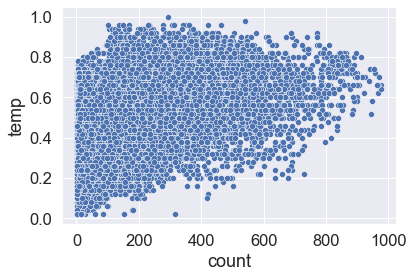

In [10]:
sns.scatterplot(data = bike, x='count', y='temp')

<Axes: xlabel='count', ylabel='humidity'>

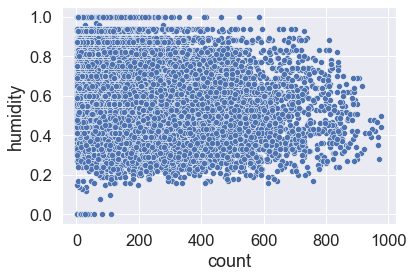

In [11]:
sns.scatterplot(data = bike, x='count', y='humidity')

<Axes: xlabel='count', ylabel='windspeed'>

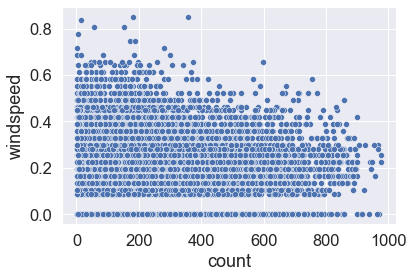

In [12]:
sns.scatterplot(data = bike, x='count', y='windspeed')

- Here if we look closely, we can observe
1- Total count of the bikes are corelated to Temperature /n 2- Total count is not influenced with Windspeed,humidity

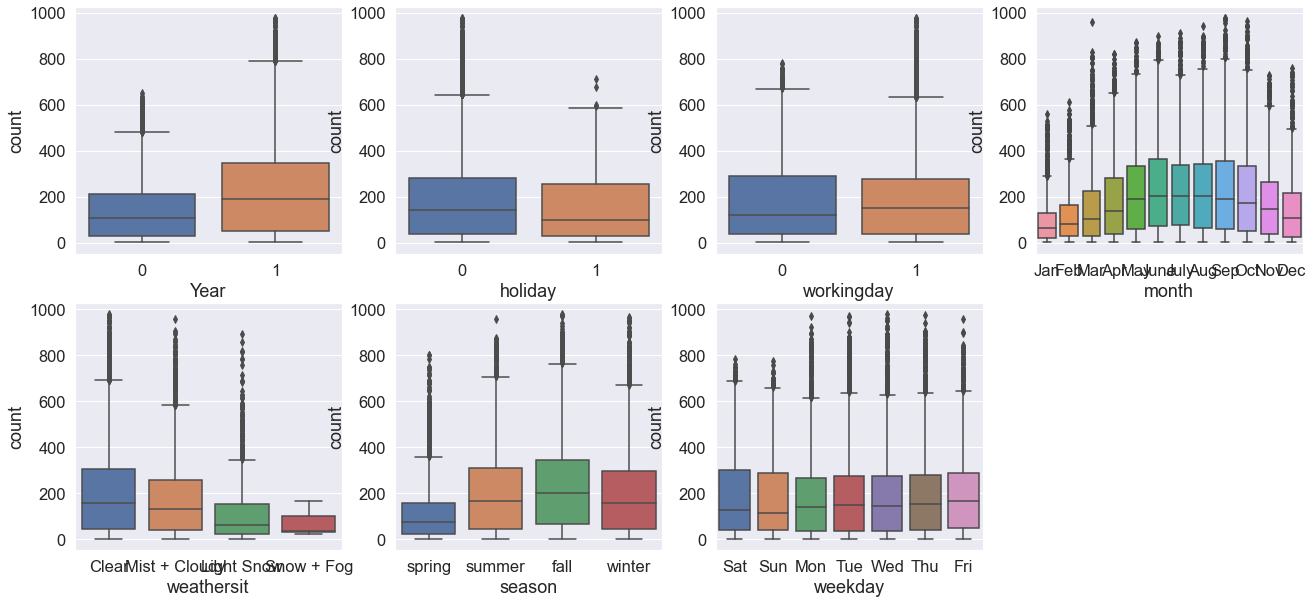

In [13]:
# scatter plot for categorical vars
plt.figure(figsize=(22, 10))

plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bike)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)

plt.show()

- More bike rentals in 2019
- Equal bike rentals in hoidays / non-holidays
- Working days doesn't matter
- Peaked on Aug to Oct
- More rentals on Clear weather
- More rentals on fall

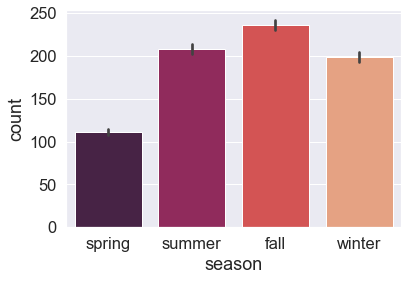

In [14]:
sns.barplot(x='season',y='count',data=bike,palette="rocket",)
plt.show()

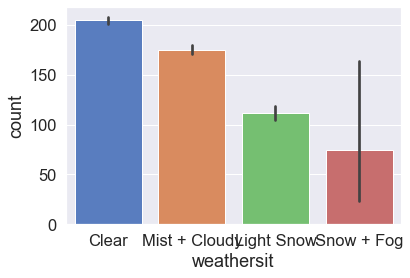

In [15]:
#Relation between weather and count of bike rentals
sns.barplot(x='weathersit',y='count',palette="muted",data=bike)
plt.show()

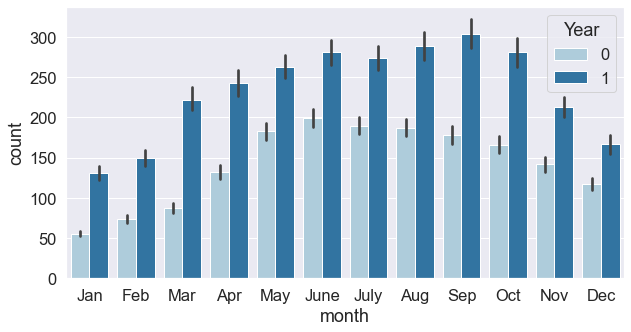

In [16]:
#Relation between month and total bikes
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='count',hue='Year',data=bike,palette='Paired')
plt.show()

## Model Building
- remove unwanted variables before the model building
- Create dummy variables
- Split the data to train / test
- rescaling the data
- Model building
- Recurring FEature Elimination
- Iteration of models based on the stats values

In [17]:
#dropping the unwanted variables - instant, date, casual, registered
# bike.drop(['Date', 'instant','casual','registered'],axis=1, inplace=True)
bike.drop(['Date', 'instant','count'],axis=1, inplace=True)
bike.head()

,season,Year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered
0,spring,0,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13
1,spring,0,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32
2,spring,0,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27
3,spring,0,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10
4,spring,0,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1


In [18]:
#final shape
bike.shape

(17379, 14)

In [19]:
bike.to_csv('cleaned_hour')

## models imports

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

### Rescaling the data
- We will be using MinMax scaler

In [21]:
#minMax the scale 
scaler=MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','atemp','humidity','windspeed','casual','registered']

#fit on data
bike[num_vars]=scaler.fit_transform(bike[num_vars])
bike.head()

,season,Year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered
0,spring,0,Jan,0,0,Sat,0,Clear,0.224490,0.2879,0.81,0.0,0.008174,0.014673
1,spring,0,Jan,1,0,Sat,0,Clear,0.204082,0.2727,0.80,0.0,0.021798,0.036117
2,spring,0,Jan,2,0,Sat,0,Clear,0.204082,0.2727,0.80,0.0,0.013624,0.030474
3,spring,0,Jan,3,0,Sat,0,Clear,0.224490,0.2879,0.75,0.0,0.008174,0.011287
4,spring,0,Jan,4,0,Sat,0,Clear,0.224490,0.2879,0.75,0.0,0.000000,0.001129


In [22]:
bike.describe()

,Year,hr,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,11.546752,0.028770,0.682721,0.486722,0.475775,0.627229,0.223460,0.097210,0.173574
std,0.500008,6.914405,0.167165,0.465431,0.196486,0.171850,0.192930,0.143811,0.134346,0.170832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,0.000000,0.326531,0.333300,0.480000,0.122840,0.010899,0.038375
50%,1.000000,12.000000,0.000000,1.000000,0.489796,0.484800,0.630000,0.228047,0.046322,0.129797
75%,1.000000,18.000000,0.000000,1.000000,0.653061,0.621200,0.780000,0.298225,0.130790,0.248307
max,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
## Data Spliting

In [24]:
# Data Splitting into features and target
X = bike.drop(columns =['casual','registered'], axis=1)
y = bike[['casual','registered']]

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
categorical_cols = list(bike.select_dtypes(include=['object']).columns)
categorical_cols

['season', 'month', 'weekday', 'weathersit']

In [26]:
numerical_cols = list(bike.select_dtypes(include=['int64', 'float64']).columns)
crl= ['casual','registered']
for i in crl:
    numerical_cols.remove(i)

numerical_cols

['Year',
 'hr',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'humidity',
 'windspeed']

In [27]:
# Data Preprocessing
from category_encoders import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[('oneHot', OneHotEncoder())])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['Year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed']),
        ('cat', categorical_transformer, ['season', 'month', 'weekday', 'weathersit'])])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [28]:
# Model Building
from sklearn.linear_model import LinearRegression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_preprocessed, y_train)

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = lr.predict(X_test_preprocessed)



# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 0.12132252372246415
R2: 0.3732535364180079


# Data Preprocessing

In [29]:
X_train.isnull().sum()

season        0
Year          0
month         0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [30]:
X_train.describe()

,Year,hr,holiday,workingday,temp,atemp,humidity,windspeed
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000
mean,0.502050,11.557146,0.028699,0.679566,0.487139,0.476183,0.627011,0.223136
std,0.500014,6.911927,0.166965,0.466660,0.196956,0.172308,0.192801,0.143755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,0.000000,0.326531,0.333300,0.470000,0.122840
50%,1.000000,12.000000,0.000000,1.000000,0.489796,0.484800,0.630000,0.193018
75%,1.000000,18.000000,0.000000,1.000000,0.653061,0.621200,0.780000,0.298225
max,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Building

In [31]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_preprocessed, y_train)


print('Training Score: ', lr.score(X_train_preprocessed, y_train))
print('Testing Score: ', lr.score(X_test_preprocessed, y_test))

Training Score:  0.37549746118603927
Testing Score:  0.3732535364180079


In [32]:
# Ridge

from sklearn.linear_model import Ridge

r = Ridge()
r.fit(X_train_preprocessed, y_train)

print('Training Score: ', r.score(X_train_preprocessed, y_train))
print('Testing Score: ', r.score(X_test_preprocessed, y_test))

Training Score:  0.3755234446005596
Testing Score:  0.37330099937084804


In [33]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = lasso.predict(X_test_preprocessed)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 0.1503658234887317
R2: -0.0009300489911956422


In [34]:
# # support vector regression (SVR)

# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(X_train_preprocessed, y_train)

# print('Training Score: ', svr.score(X_train_preprocessed, y_train))
# print('Testing Score: ', svr.score(X_test_preprocessed, y_test))

In [35]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train_preprocessed, y_train)

print('Training Score: ', dt.score(X_train_preprocessed, y_train))
print('Testing Score: ', dt.score(X_test_preprocessed, y_test))

Training Score:  0.9814013530040746
Testing Score:  0.16725430426327959


In [36]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=12 ,random_state=42, max_depth=9)

rf.fit(X_train_preprocessed, y_train)

print('Training Score: ', rf.score(X_train_preprocessed, y_train))
print('Testing Score: ', rf.score(X_test_preprocessed, y_test))

Training Score:  0.6002165738311065
Testing Score:  0.5199950712531971


In [37]:
rf.feature_importances_

array([0.07864083, 0.00376104, 0.13159615, 0.10419915, 0.27375377,
       0.21114617, 0.04425923, 0.00577034, 0.01976443, 0.00350016,
       0.00783814, 0.00049053, 0.00634964, 0.00315517, 0.00341338,
       0.01125042, 0.00648128, 0.00079738, 0.0023069 , 0.01057711,
       0.0121484 , 0.00142861, 0.01110892, 0.00363476, 0.00364075,
       0.0043477 , 0.00292279, 0.0031212 , 0.00300603, 0.00736122,
       0.00555457, 0.00407623, 0.0085976 , 0.        ])

In [38]:
column_names = preprocessor.get_feature_names_out()

In [39]:
pd.DataFrame({'Feature': column_names, 'Importance': rf.feature_importances_.round(3)}).sort_values('Importance', ascending=False)

,Feature,Importance
4,num__atemp,0.274
5,num__humidity,0.211
2,num__workingday,0.132
3,num__temp,0.104
0,num__Year,0.079
6,num__windspeed,0.044
8,cat__season_2,0.020
20,cat__month_10,0.012
19,cat__month_9,0.011
22,cat__month_12,0.011


<Axes: >

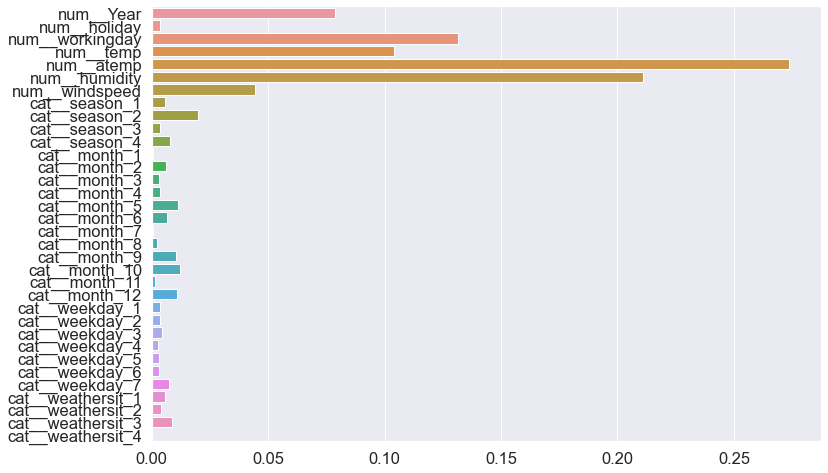

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(x=rf.feature_importances_, y=column_names)

In [41]:
# XGBoost

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=300, max_depth=3, random_state=42)

# Fitting the data
xgb.fit(X_train_preprocessed, y_train)

# Checking the score
print('Training Score: ', xgb.score(X_train_preprocessed, y_train))
print('Testing Score: ', xgb.score(X_test_preprocessed, y_test))

Training Score:  0.5873503983439029
Testing Score:  0.532740861832642


In [42]:
# hyper tuning
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'n_estimators':[100,200,300,400],
    'max_depth': range(3,8),
}
clf = XGBRegressor()
RCV = RandomizedSearchCV(estimator=clf, 
                   param_distributions=parameters, 
                   n_iter=3,
                   cv=3)

In [43]:
RCV.fit(X_train_preprocessed,y_train)


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                         

In [44]:
RCV.best_params_

{'n_estimators': 100, 'max_depth': 6}

In [45]:
RCV.best_score_

0.5000586758716672

In [46]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators':[100,200,300,400],
    'max_depth': range(3,8),
}
clf = XGBRegressor()
GCV = GridSearchCV(estimator=clf, 
                   param_grid=parameters, 
                   cv=3)

In [47]:
GCV.fit(X_train_preprocessed , y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
 

In [48]:
GCV.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [49]:
GCV.best_score_

0.5034872898330954

In [50]:
# XGBoost

from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, max_depth=2, random_state=42)

# Fitting the data
xgb.fit(X_train_preprocessed, y_train)

# Checking the score
print('Training Score: ', xgb.score(X_train_preprocessed, y_train))
print('Testing Score: ', xgb.score(X_test_preprocessed, y_test))

Training Score:  0.48197098675514455
Testing Score:  0.47467312918426624


In [51]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=10, random_state=0)

RandomForestRegressor()

# Fitting the data
regr.fit(X_train_preprocessed, y_train)

# Checking the score
print('Training Score: ', regr.score(X_train_preprocessed, y_train))
print('Testing Score: ', regr.score(X_test_preprocessed, y_test))

Training Score:  0.6621720806763224
Testing Score:  0.5463901264199035


In [52]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=10, random_state=0, 
                             criterion='absolute_error')
regr.fit(X_train_preprocessed, y_train)
RandomForestRegressor()

# Checking the score
print('Training Score: ', regr.score(X_train_preprocessed, y_train))
print('Testing Score: ', regr.score(X_test_preprocessed, y_test))

Training Score:  0.6056938819568389
Testing Score:  0.5133898564400954


In [53]:
regr = RandomForestRegressor(max_depth=10, random_state=1, 
                             criterion='friedman_mse')
regr.fit(X_train_preprocessed, y_train)
RandomForestRegressor()

# Checking the score
print('Training Score: ', regr.score(X_train_preprocessed, y_train))
print('Testing Score: ', regr.score(X_test_preprocessed, y_test))

Training Score:  0.6474515156377312
Testing Score:  0.5344628932479458


In [54]:
Models_Summarization = pd.DataFrame(
                {
                    
'Training Accuracy': [round(lr.score(X_train_preprocessed, y_train) * 100, 2), 
                                          round(r.score(X_train_preprocessed, y_train) * 100, 2), 
#                                           round(svr.score(X_train_preprocessed, y_train) * 100, 2), 
                                          round(dt.score(X_train_preprocessed, y_train) * 100, 2), 
                                          round(rf.score(X_train_preprocessed, y_train) * 100, 2), 
#                                           round(voting_reg.score(X_train_preprocessed, y_train) * 100, 2), 
#                                           round(bag_reg.score(X_train_preprocessed, y_train) * 100, 2),
#                                           round(ada_reg.score(X_train_preprocessed, y_train) * 100, 2),
#                                           round(grad_reg.score(X_train_preprocessed, y_train) * 100, 2),
                                          round(xgb.score(X_train_preprocessed, y_train) * 100, 2),
                                          round(regr.score(X_train_preprocessed, y_train) * 100, 2)], 
'Teasting Accuracy': [round(lr.score(X_test_preprocessed, y_test) * 100, 2), 
                                         round(r.score(X_test_preprocessed, y_test) * 100, 2), 
#                                          round(svr.score(X_test_preprocessed, y_test) * 100, 2), 
                                         round(dt.score(X_test_preprocessed, y_test) * 100, 2), 
                                         round(rf.score(X_test_preprocessed, y_test) * 100, 2), 
#                                          round(voting_reg.score(X_test_preprocessed, y_test) * 100, 2), 
#                                          round(bag_reg.score(X_test_preprocessed, y_test) * 100, 2), 
#                                          round(ada_reg.score(X_test_preprocessed, y_test) * 100, 2),
#                                          round(grad_reg.score(X_test_preprocessed, y_test) * 100, 2),
                                         round(xgb.score(X_test_preprocessed, y_test) * 100, 2),
                     round(regr.score(X_test_preprocessed, y_test) * 100, 2)], 
              
                },
    
    index = ['Linear Regression', 'Ridge Regression',  ' DecisionTreeRegressor', 
         'Random Forest Regressor','XGBoost','RandomForest with GridSearch']
            )